In [ ]:
# Exploratory Data Analysis

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [ ]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
# check each column's null values
null_sum = df.isnull().sum()
df.columns[null_sum > len(df) * 0.3]

df.drop(columns=df.columns[null_sum > len(df) * 0.3], inplace=True)

In [ ]:
'''
# check if price is in $, but our data has no
currency = ['price']
for c in currency:
    df[c] = df[c].replace(
        r'[$,-]', '', regex=True).replace(
        r'^\s*$', np.nan, regex=True).astype(float)

# if contains 'Acre' or sqft' transferto float, our data has no
areas = ['sqft_above', 'sqft_basement']
for c in areas:
    acres = df[c].str.contains('Acres') == True
    col = df[c].replace(r'\b sqft\b|\b Acres\b|\b,\b','', regex=True).astype(float)
    col[acres] *= 43560
    df[c] = col
'''

"\n# check if price is in $, but our data has no\ncurrency = ['price']\nfor c in currency:\n    df[c] = df[c].replace(\n        r'[$,-]', '', regex=True).replace(\n        r'^\\s*$', np.nan, regex=True).astype(float)\n\n# if contains 'Acre' or sqft' transferto float, our data has no\nareas = ['sqft_above', 'sqft_basement']\nfor c in areas:\n    acres = df[c].str.contains('Acres') == True\n    col = df[c].replace(r'\x08 sqft\x08|\x08 Acres\x08|\x08,\x08','', regex=True).astype(float)\n    col[acres] *= 43560\n    df[c] = col\n"

In [ ]:
 # abnadom abnoraml data rows

abnormal = (df['sqft_lot'] < 10) | (df['sqft_lot'] > 1e4)
df = df[~abnormal]
sum(abnormal)


6170

In [ ]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15443.000000,1.544300e+04,1.544300e+04,15433.000000,15438.000000,15443.000000,15443.000000,15443.000000,15443.000000,15443.000000,15443.000000,15443.000000,15443.000000,15443.000000,15443.000000,15443.000000,15443.000000,15443.000000,15443.000000,15443.000000,15443.000000
mean,11085.074662,4.773088e+09,4.943225e+05,3.298387,2.049164,1906.820890,6041.677718,1.522373,0.002266,0.169980,3.393576,7.481383,1643.954478,262.866412,1969.827430,78.869844,98085.961924,47.565023,-122.239492,1840.674092,6259.388072
std,6350.303971,2.889568e+09,2.778254e+05,0.929226,0.734900,755.782415,2375.753245,0.557532,0.047554,0.640291,0.650777,0.998879,692.548466,391.938147,32.053546,388.946316,52.735640,0.134732,0.129910,580.311944,2698.679343
min,0.000000,1.000102e+06,8.000000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.189600,-122.512000,460.000000,651.000000
25%,5578.500000,2.313901e+09,3.110000e+05,3.000000,1.500000,1350.000000,4400.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1130.000000,0.000000,1947.000000,0.000000,98038.000000,47.487050,-122.344000,1420.000000,4502.000000
50%,11154.000000,4.083306e+09,4.310000e+05,3.000000,2.000000,1780.000000,6203.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1460.000000,0.000000,1972.000000,0.000000,98103.000000,47.577200,-122.284000,1720.000000,6232.000000
75%,16650.500000,7.524050e+09,6.000000e+05,4.000000,2.500000,2340.000000,7943.500000,2.000000,0.000000,0.000000,4.000000,8.000000,2010.000000,500.000000,2001.000000,0.000000,98119.000000,47.679400,-122.165000,2150.000000,8000.000000
max,21612.000000,9.900000e+09,3.650000e+06,33.000000,7.500000,6840.000000,10000.000000,3.500000,1.000000,4.000000,5.000000,13.000000,6110.000000,2490.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,4950.000000,70973.000000


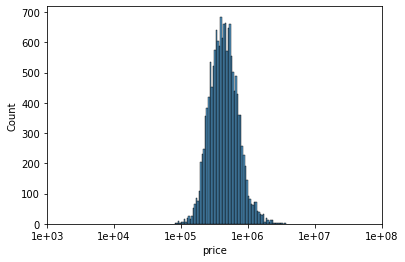

In [ ]:
#check output target price

ax = sns.histplot(np.log10(df['price']))
ax.set_xlim([3, 8])
ax.set_xticks(range(3, 9))
ax.set_xticklabels(['%.0e'%a for a in 10**ax.get_xticks()]);

In [ ]:
df['bedrooms'].value_counts()

3.0     7125
4.0     4630
2.0     2356
5.0      972
6.0      160
1.0      151
7.0       22
8.0        8
9.0        6
11.0       1
33.0       1
10.0       1
Name: bedrooms, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


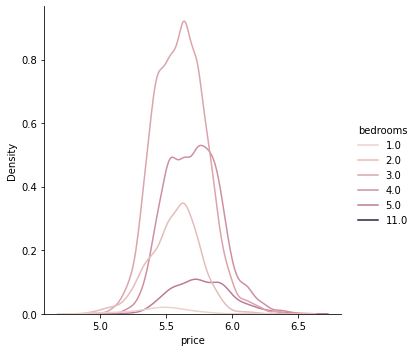

In [ ]:
# check Price density for different bedrooms sizes.


types = df['bedrooms'].isin([1.0, 2.0, 3.0, 4.0, 5.0, 11.0])
sns.displot(pd.DataFrame({'price':np.log10(df[types]['price']),
                          'bedrooms':df[types]['bedrooms']}),
            x='price', hue='bedrooms', kind='kde');

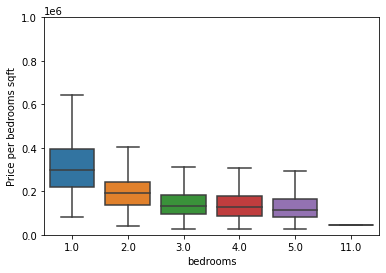

In [ ]:
df['Price per bedrooms sqft'] = df['price'] / df['bedrooms']
ax = sns.boxplot(x='bedrooms', y='Price per bedrooms sqft', data=df[types], fliersize=0)
ax.set_ylim([0, 1e6]);


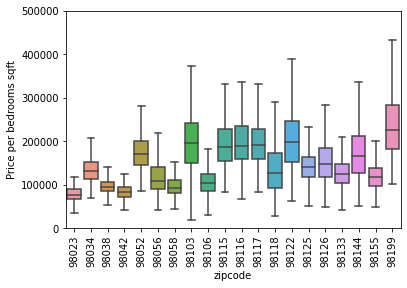

In [ ]:
# price vs zip code

d = df[df['zipcode'].isin(df['zipcode'].value_counts()[:20].keys())]
ax = sns.boxplot(x='zipcode', y='Price per bedrooms sqft', data=d, fliersize=0)
ax.set_ylim([0, 500000])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

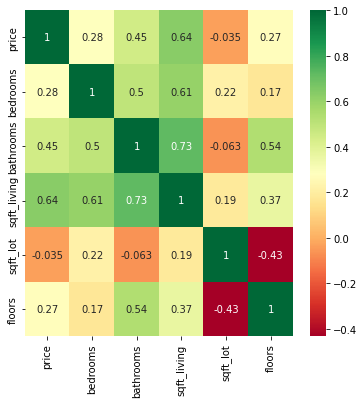

In [ ]:
# check correlation of features with target price

_, ax = plt.subplots(figsize=(6,6))
columns =  ['price', 'bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot',	'floors',	] # 'waterfront',	'view',	'condition',	'grade',	'sqft_above',	'sqft_basement',	'yr_built',	'yr_renovated',	'zipcode',	'lat',	'long',	'sqft_living15',	'sqft_lot15']

sns.heatmap(df[columns].corr(),annot=True,cmap='RdYlGn', ax=ax);

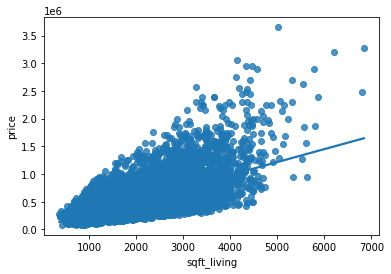

In [84]:
# Use the functin  regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.

sns.regplot(x="sqft_living", y="price", data=df, ci = None)
